<a href="https://colab.research.google.com/github/JuanCervigon/Master/blob/main/110_PCA_y_FA_iris.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Importar librerias mecesarias
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

from sklearn.datasets import load_iris
from sklearn.decomposition import PCA, FactorAnalysis
from sklearn.preprocessing import StandardScaler

In [ ]:
# Leer los datos
fichero_datos = load_iris()

In [ ]:
type(fichero_datos) # data es un objeto 'bunch', una especie de diccionario {key,value}

In [ ]:
fichero_datos

In [ ]:
# Podemos extraer de data el nombre de las variables en una lista
variables = fichero_datos["feature_names"]
valores=fichero_datos["data"]
# los datos de las variables en un dataframe
df=pd.DataFrame(valores, columns=variables)
df


In [ ]:
# Estandarizar los datos y guardarlos en un. array
x = StandardScaler().fit_transform(fichero_datos["data"])


# Calculo de la matriz de correlaciones

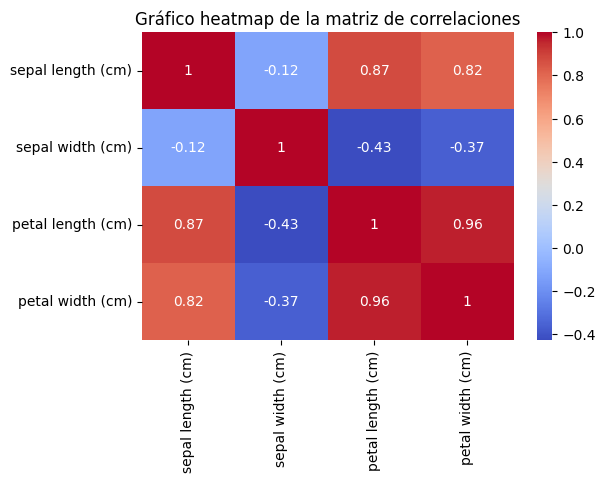

In [ ]:
# Gráfico heatmap o mapa de color de la matriz de correlaciones
import seaborn as sns
color='coolwarm'
# para cambiar la escala de colores usar por ejemplo color='viridis'


plt.figure(figsize=(6, 4))
sns.heatmap(np.corrcoef(x.T), annot=True, cmap=color,
            xticklabels=variables, yticklabels=variables)

plt.title('Gráfico heatmap de la matriz de correlaciones')
plt.show()

# Calculo de las CARGAS y la PUNTUACIONES

* Cargas, pesos, weights o loads. Son matrices que para interpretar los factores. Tienen dimensión número de factores x número de variables
* Puntuaciones o scores. Son matrices con las puntuaciones de cada individuo u observación en los factores. Tienen dimensión número de individuos x número de factores



In [ ]:
# Crear una lista con los tres modelos. Cada elemento de la lista tiene una tuple
modelos=[
    ("PCA", PCA()),
    ("FA", FactorAnalysis()),
    ("FA+varimax", FactorAnalysis(rotation="varimax"))]


In [ ]:
# comprobar el tipo de objeto modelos y el tipo de objetos de los elementos de modelos
type(modelos[0])

tuple

In [ ]:
# Crear unas lista para guardar las cargas y otra para guardar las puntuaciones

loads=[]
scores=[]

for nombre,modelo in modelos:
    modelo.set_params(n_components=2)
    modelo.fit(x)

    loads.append(modelo.components_.T)
    scores.append(modelo.transform(x))


In [ ]:
type(loads[0])

numpy.ndarray

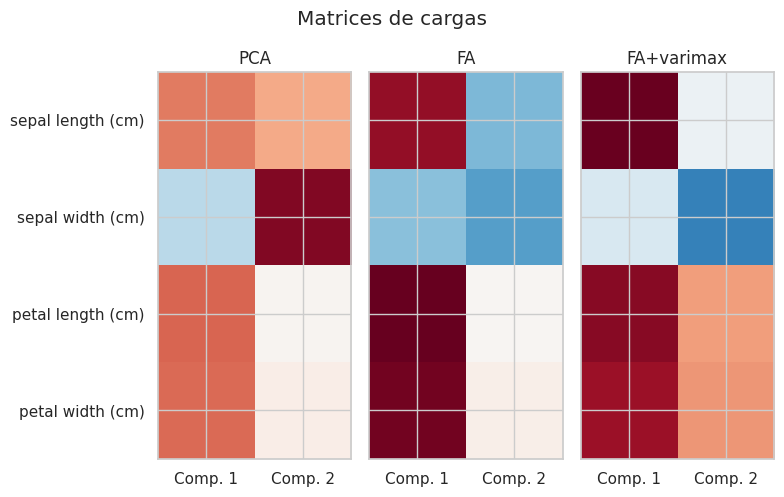

In [ ]:
# Hacer un gráfico heatmap con las matrices de cargas

fig, axes = plt.subplots(ncols=len(modelos), figsize=(8, 5), sharey=True)

for ax, carga, modelo in zip(axes, loads, modelos):
    im=ax.imshow(carga, cmap="RdBu_r", vmax=1, vmin=-1)
    ax.set_yticks([0,1,2,3])
    ax.set_yticklabels(variables)
    ax.set_title(modelo[0])
    ax.set_xticks([0, 1])
    ax.set_xticklabels(["Comp. 1", "Comp. 2"])

fig.suptitle("Matrices de cargas")
plt.tight_layout()
plt.show()


In [ ]:
scores[0][:,0]

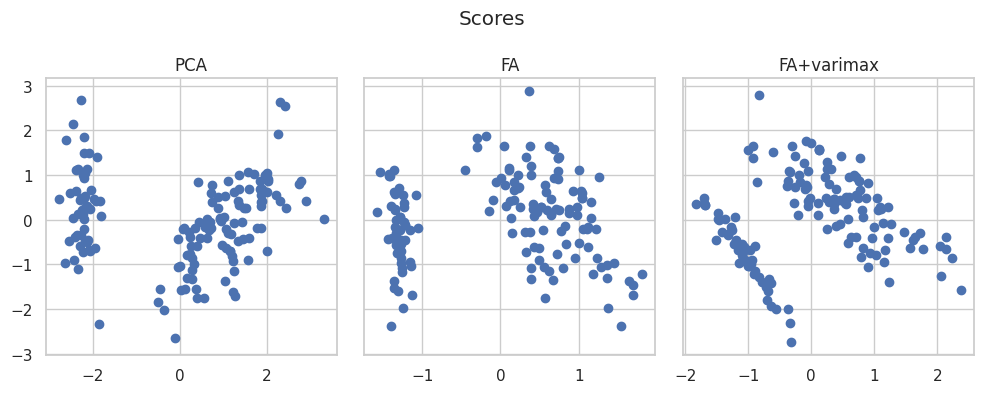

In [ ]:
# Hacer un gráfico xy con los scores de cada modelo

fig, axes = plt.subplots(ncols=len(modelos), figsize=(10, 4), sharey=True)

for ax, score, modelo in zip(axes, scores, modelos):

     ax.scatter(score[:,0],score[:,1])
     ax.set_title(modelo[0])

fig.suptitle("Scores")
plt.tight_layout()
plt.show()


In [ ]:
# Hacer el mismo gráfico heatmap de las cargas con seaborn

fig, axs = plt.subplots(1, 3, figsize=(15, 5))  # Create a 1x3 grid of subplots

for i in [0, 1, 2]:
  sns.heatmap(loads[i], annot=True, cmap='hot', ax=axs[i], cbar=True, yticklabels=variables)
  axs[i].set_title(modelos[i][0])


plt.tight_layout()
plt.show()
